In [1]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../deepcoloring')

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from os import listdir
from os.path import join
from train_cvppp import evaluate

import deepcoloring as dc

%matplotlib inline
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In order to run this example you need to download dataset https://www.plant-phenotyping.org/datasets-download

In [2]:
!if [ ! -f model.t7 ]; then wget https://www.dropbox.com/s/whwzh9pdbk69o7x/cvppp_model.t7 -O model.t7; fi

In [3]:
net = dc.EUnet(3, 9, 4, 3, 1, depth=3, padding=1, init_xavier=True, use_bn=False, use_dropout=True).to(device)
net.load_state_dict(
    torch.load("model.t7", map_location=torch.device('cpu'))
)
net.eval()
print("Model loaded")

Model loaded


torch.Size([1, 128, 42, 44]) torch.Size([1, 128, 42, 44])
torch.Size([1, 64, 84, 88]) torch.Size([1, 64, 84, 89])
torch.Size([1, 64, 84, 88]) torch.Size([1, 64, 84, 88])
1 2
torch.Size([1, 32, 168, 176]) torch.Size([1, 32, 168, 176])


(<Figure size 1440x720 with 2 Axes>, <Figure size 1440x720 with 9 Axes>)

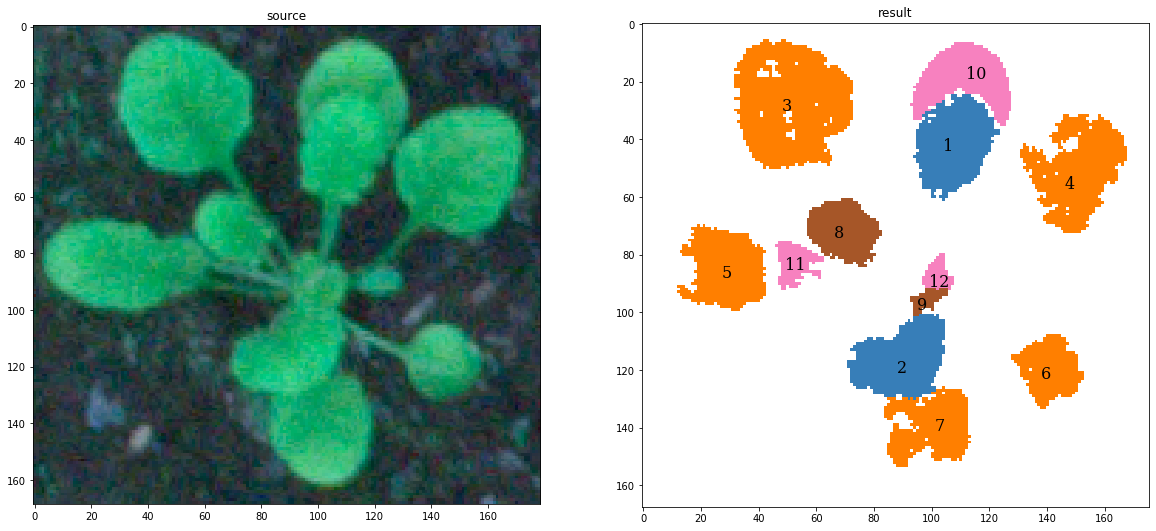

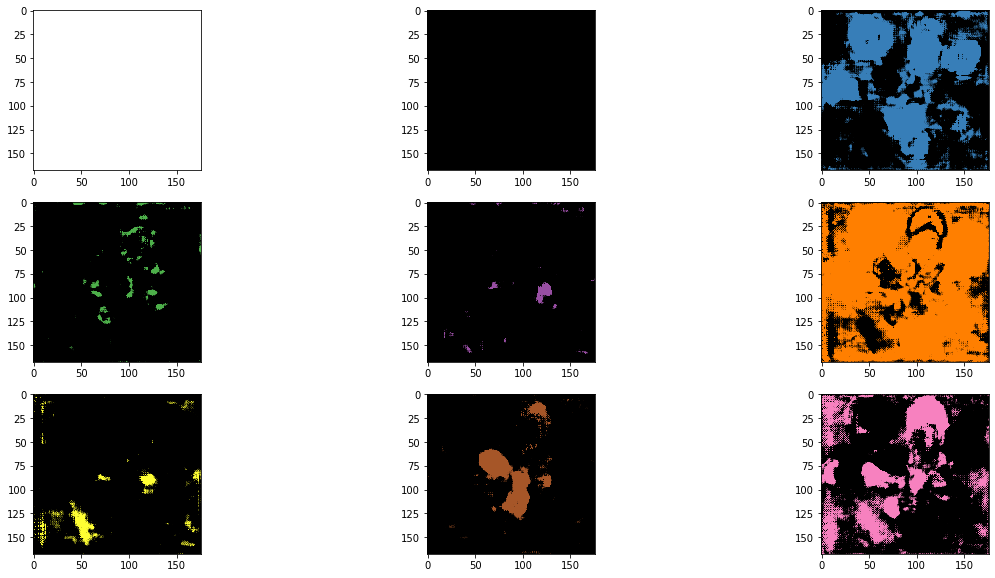

In [5]:
from skimage.io import imread
import cv2
xo = cv2.imread("Plant_Phenotyping_Datasets/Tray/Ara2012/ara2012_tray03_rgb.png")
# 239,537,239,811,503,811,503,537
# 586,202,586,415,785,415,785,202
# 643,864,643,1033,822,1033,822,864
isolated_plant_1 = xo[537:811, 239:503, :]
isolated_plant_2 = xo[202:415, 586:785, :]
isolated_plant_3 = xo[864:1033, 643:822]
plant = isolated_plant_3
x = cv2.cvtColor(plant, cv2.COLOR_BGR2RGB)/255
x = dc.normalize(0.5, 0.5, )(x, True)
x = x.transpose(2, 0, 1)[:, :248, :248]

vx = torch.from_numpy(np.expand_dims(x, 0)).to(device)
p = net(vx.float())
p_numpy = p.detach().cpu().numpy()[0]
dc.visualize(plant[:,:,:3],p_numpy,65)